<a href="https://colab.research.google.com/github/earandir/DataAnalysis/blob/main/Modulo03/Sesion08/M03S08R05_ratings_de_mas_valoradas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 5: Distribución de ratings de las películas más valoradas

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Creación de filtros usando `apply`
    
---
    
### 2. Desarrollo:

#### a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

`[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]`

Realiza los siguientes pasos:

1. Lee tus archivos `ratings` y `movies`.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista (puedes usar el operador `in` de Python).
4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`. Asigna el resultado a la variable `ratings_filtrados_con_nombre`.

> **Nota** el paso #4 es algo complejo. Si tienes dificultades para realizarlo, ¡no dudes en pedirle ayuda a tu experta!

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('ratings.csv', index_col=0)
#ratings.set_index(list(ratings.columns), drop=True, inplace=True)
ratings.head(3)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,movie_id,rating,timestamp
user_id,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968


In [3]:
movies = pd.read_csv('movies.csv', index_col=0)
#movies.set_index(list(movies.columns), drop=False, inplace=True)
movies.reset_index(inplace=True)

In [4]:
ratings = ratings.groupby('movie_id').count()
ratings.reset_index(inplace=True)

In [12]:
#ratings.sort_values('rating', ascending=False, inplace=True)
ratings.head(3)

,movie_id,rating,timestamp
0,1,6231,6231
1,2,2103,2103
2,3,1434,1434


In [91]:
all_movies = ratings.loc[ratings['rating'] > 2500]['movie_id']

In [59]:
movies_with_2k_ratings = list(ratings.loc[ratings['rating'] > 2500]['movie_id'])

In [18]:
valid_movies = [2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]

In [52]:
index_of_valid_movies = [movies_with_2k_ratings.index(i) for i in valid_movies]

In [57]:
calculated_valid_movies = [movies_with_2k_ratings[i] for i in index_of_valid_movies]

In [62]:
ratings.loc[ratings['movie_id'].isin(calculated_valid_movies)]

,movie_id,rating,timestamp
253,260,8973,8973
466,480,8016,8016
575,589,7947,7947
579,593,7734,7734
593,608,7539,7539
1106,1196,8970,8970
1108,1198,7542,7542
1120,1210,8649,8649
1178,1270,7749,7749
1449,1580,7614,7614


In [64]:
def check_movie_id(a_movie_id, a_list_of_movies):

  if a_movie_id in a_list_of_movies:
    return True
  else:
    return False

In [92]:
check_movies = all_movies.apply(check_movie_id, args=(valid_movies))

TypeError: ignored

In [85]:
ratings_filtrados_con_nombre = ratings.iloc[list(check_movies.iloc[index_of_valid_movies].index),]

In [87]:
ratings_filtrados_con_nombre = pd.merge(ratings_filtrados_con_nombre, movies, left_on='movie_id', right_index=True)

In [88]:
ratings_filtrados_con_nombre

,movie_id,movie_id_x,rating,timestamp,movie_id_y,title,genres
2651,2858,2858,10284,10284,2927,Brief Encounter (1946),Drama|Romance
253,260,260,8973,8973,263,Ladybird Ladybird (1994),Drama
1106,1196,1196,8970,8970,1214,Alien (1979),Action|Horror|Sci-Fi|Thriller
1120,1210,1210,8649,8649,1228,Raging Bull (1980),Drama
466,480,480,8016,8016,484,Lassie (1994),Adventure|Children's
1848,2028,2028,7959,7959,2097,Something Wicked This Way Comes (1983),Children's|Horror
575,589,589,7947,7947,593,"Silence of the Lambs, The (1991)",Drama|Thriller
2374,2571,2571,7770,7770,2640,Superman (1978),Action|Adventure|Sci-Fi
1178,1270,1270,7749,7749,1290,Some Kind of Wonderful (1987),Drama|Romance
579,593,593,7734,7734,597,Pretty Woman (1990),Comedy|Romance


In [ ]:
...

ratings_filtrados_con_nombre =

SyntaxError: ignored

A continuación la celda de validación, pero tu `DataFrame` resultante debe de tener una columna `title` y otra `rating` para que la visualización pueda funcionar:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


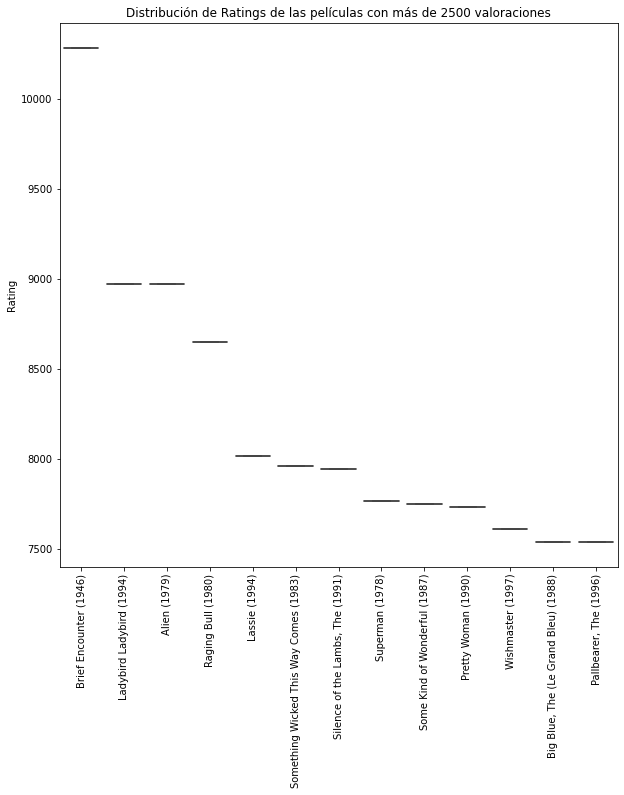

In [89]:
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(ratings_filtrados_con_nombre['title'], ratings_filtrados_con_nombre['rating'], ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    
visualizar_boxplots(ratings_filtrados_con_nombre)